In [1]:
#sentiment analysis
import pandas as pd

reddit = pd.read_csv("RedditNews.csv", engine="python", sep=",", error_bad_lines=False)

# Show DataFrame
reddit.head()

,Date,Title
0,7/1/16,IMF chief backs Athens as permanent Olympic host
1,7/1/16,"The president of France says if Brexit won, so..."
2,7/1/16,British Man Who Must Give Police 24 Hours' Not...
3,7/1/16,100+ Nobel laureates urge Greenpeace to stop o...
4,7/1/16,Brazil: Huge spike in number of police killing...


In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


reddit['cleanText']=reddit['Title'].map(lambda s:preprocess(s))

In [4]:
reddit.head()

,Date,Title,cleanText
0,7/1/16,IMF chief backs Athens as permanent Olympic host,imf chief backs athens permanent olympic host
1,7/1/16,"The president of France says if Brexit won, so...",president france says brexit donald trump
2,7/1/16,British Man Who Must Give Police 24 Hours' Not...,british man must give police hours notice sex ...
3,7/1/16,100+ Nobel laureates urge Greenpeace to stop o...,nobel laureates urge greenpeace stop opposing ...
4,7/1/16,Brazil: Huge spike in number of police killing...,brazil huge spike number police killings rio a...


In [5]:
reddit['Date'] =  pd.to_datetime(reddit['Date'])
reddit.head()

,Date,Title,cleanText
0,2016-07-01,IMF chief backs Athens as permanent Olympic host,imf chief backs athens permanent olympic host
1,2016-07-01,"The president of France says if Brexit won, so...",president france says brexit donald trump
2,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,british man must give police hours notice sex ...
3,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,nobel laureates urge greenpeace stop opposing ...
4,2016-07-01,Brazil: Huge spike in number of police killing...,brazil huge spike number police killings rio a...


In [6]:
foo = lambda a: " ".join(a) 

In [7]:
pd.options.display.max_colwidth = 100

In [8]:
new_reddit = reddit.groupby(by='Date').agg(foo).reset_index()
new_reddit['cleanText'].head()

0    work resident doctor one biggest hospitals mexico city sadly situation far control london cop fa...
1    outbreak swine flu renamed mexican influenza deference muslim jewish sensitivities pork said isr...
2    muslims dont care swine flu called swine flu israeli minister speak mexico outbreak traced manur...
3    everybody talking flu mexico legalize drugs personal use egypt orders slaughter pigs roughly swi...
4    breaking news attack dutch royal family car tries hit royal bus high speed hits public truth beh...
Name: cleanText, dtype: object

In [9]:
new_reddit.sort_values(by=['Date'], ascending = True)

,Date,Title,cleanText
0,2009-04-26,"b'""I work as a resident doctor in one of the biggest hospitals in Mexico City and sadly, the sit...",work resident doctor one biggest hospitals mexico city sadly situation far control london cop fa...
1,2009-04-27,"b'The outbreak of swine flu should be renamed ""Mexican"" influenza in deference to Muslim and Jew...",outbreak swine flu renamed mexican influenza deference muslim jewish sensitivities pork said isr...
2,2009-04-28,"b""Muslims dont care about Swine Flu being called Swine Flu. The Israeli minister doesn't speak ...",muslims dont care swine flu called swine flu israeli minister speak mexico outbreak traced manur...
3,2009-04-29,"b'While everybody its talking about the flu, Mexico will legalize Drugs for personal use' b'Egyp...",everybody talking flu mexico legalize drugs personal use egypt orders slaughter pigs roughly swi...
4,2009-04-30,"b'BREAKING NEWS: Attack on Dutch Royal family, car tries to hit royal bus at high speed, hits pu...",breaking news attack dutch royal family car tries hit royal bus high speed hits public truth beh...
5,2009-05-01,"b'""But a remarkable thing happened this week. On Monday, 400 of his fellow students, wearing bla...",remarkable thing happened week monday fellow students wearing black solidarity carrying signs su...
6,2009-05-02,"b'On July 1, 2001, Portugal decriminalized all drugs, including cocaine and heroin. Judged by vi...",july portugal decriminalized drugs including cocaine heroin judged virtually every metric portug...
7,2009-05-03,"b'""This guy wearing a white coat walked slowly towards the wounded saying to the soldiers, \'Don...",guy wearing white coat walked slowly towards wounded saying soldiers kill doctor shot dead truly...
8,2009-05-04,b'Saudi Arabia to consider banning marriage of girls under 18' b'Pregnant woman miscarries after...,saudi arabia consider banning marriage girls pregnant woman miscarries traffic accident fault du...
9,2009-05-05,b'Brazilian cattle ranching company wants permission from the Paraguayan government to destroy t...,brazilian cattle ranching company wants permission paraguayan government destroy forest ayoreo t...


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
preprocess = []
analyzer = SentimentIntensityAnalyzer()
for clean in new_reddit['cleanText']:
    vs = analyzer.polarity_scores(clean)
    preprocess.append(vs)


In [13]:
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

In [14]:
df3 = pd.DataFrame(preprocess)

In [15]:
df4 = pd.concat([new_reddit,df3], axis=1)

In [16]:
df4

,Date,Title,cleanText,compound,neg,neu,pos
0,2009-04-26,"b'""I work as a resident doctor in one of the biggest hospitals in Mexico City and sadly, the sit...",work resident doctor one biggest hospitals mexico city sadly situation far control london cop fa...,-0.1531,0.193,0.625,0.182
1,2009-04-27,"b'The outbreak of swine flu should be renamed ""Mexican"" influenza in deference to Muslim and Jew...",outbreak swine flu renamed mexican influenza deference muslim jewish sensitivities pork said isr...,-0.9871,0.194,0.740,0.067
2,2009-04-28,"b""Muslims dont care about Swine Flu being called Swine Flu. The Israeli minister doesn't speak ...",muslims dont care swine flu called swine flu israeli minister speak mexico outbreak traced manur...,-0.8136,0.189,0.622,0.188
3,2009-04-29,"b'While everybody its talking about the flu, Mexico will legalize Drugs for personal use' b'Egyp...",everybody talking flu mexico legalize drugs personal use egypt orders slaughter pigs roughly swi...,-0.9880,0.203,0.719,0.078
4,2009-04-30,"b'BREAKING NEWS: Attack on Dutch Royal family, car tries to hit royal bus at high speed, hits pu...",breaking news attack dutch royal family car tries hit royal bus high speed hits public truth beh...,-0.9971,0.326,0.610,0.064
5,2009-05-01,"b'""But a remarkable thing happened this week. On Monday, 400 of his fellow students, wearing bla...",remarkable thing happened week monday fellow students wearing black solidarity carrying signs su...,-0.9953,0.250,0.638,0.111
6,2009-05-02,"b'On July 1, 2001, Portugal decriminalized all drugs, including cocaine and heroin. Judged by vi...",july portugal decriminalized drugs including cocaine heroin judged virtually every metric portug...,-0.9918,0.245,0.645,0.110
7,2009-05-03,"b'""This guy wearing a white coat walked slowly towards the wounded saying to the soldiers, \'Don...",guy wearing white coat walked slowly towards wounded saying soldiers kill doctor shot dead truly...,-0.9805,0.206,0.679,0.115
8,2009-05-04,b'Saudi Arabia to consider banning marriage of girls under 18' b'Pregnant woman miscarries after...,saudi arabia consider banning marriage girls pregnant woman miscarries traffic accident fault du...,-0.9924,0.221,0.674,0.104
9,2009-05-05,b'Brazilian cattle ranching company wants permission from the Paraguayan government to destroy t...,brazilian cattle ranching company wants permission paraguayan government destroy forest ayoreo t...,-0.9972,0.311,0.622,0.067


In [17]:
djia = pd.read_csv("DJIA.csv", engine="python", sep=",", error_bad_lines=False)

In [18]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [19]:
djia['Date'] =  pd.to_datetime(djia['Date'], format='%Y-%m-%d')

In [20]:
djia = djia.sort_values(by=['Date'], ascending = True)
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [21]:
returns = ((djia.Close - djia.Close.shift(1))/djia.Close.shift(1))
returns.head()

1988         NaN
1987    0.004093
1986   -0.011872
1985   -0.009406
1984    0.007194
Name: Close, dtype: float64

In [22]:
djia['returns'] = returns

In [207]:
import numpy as np

volatility = (np.log2((djia.High - djia.Low)))

In [208]:
djia['volatility'] = volatility

In [209]:
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,volatility
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,NaN,8.538848
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004093,7.581804
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.011872,7.498491
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.009406,7.495379
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.007194,8.062805


In [211]:
dow=pd.merge(djia,df4, how='inner')
dow.head()

,Date,Open,High,Low,Close,Volume,Adj Close,returns,volatility,Title,cleanText,compound,neg,neu,pos
0,2009-04-27,8073.819824,8122.560059,7987.160156,8025.000000,282990000,8025.000000,-0.006351,7.081083,"b'The outbreak of swine flu should be renamed ""Mexican"" influenza in deference to Muslim and Jew...",outbreak swine flu renamed mexican influenza deference muslim jewish sensitivities pork said isr...,-0.9871,0.194,0.740,0.067
1,2009-04-28,8023.560059,8091.660156,7938.979980,8016.950195,274710000,8016.950195,-0.001003,7.254369,"b""Muslims dont care about Swine Flu being called Swine Flu. The Israeli minister doesn't speak ...",muslims dont care swine flu called swine flu israeli minister speak mexico outbreak traced manur...,-0.8136,0.189,0.622,0.188
2,2009-04-29,8018.310059,8257.570312,8017.910156,8185.729980,300340000,8185.729980,0.021053,7.904846,"b'While everybody its talking about the flu, Mexico will legalize Drugs for personal use' b'Egyp...",everybody talking flu mexico legalize drugs personal use egypt orders slaughter pigs roughly swi...,-0.9880,0.203,0.719,0.078
3,2009-04-30,8188.509766,8307.509766,8136.899902,8168.120117,341400000,8168.120117,-0.002151,7.414557,"b'BREAKING NEWS: Attack on Dutch Royal family, car tries to hit royal bus at high speed, hits pu...",breaking news attack dutch royal family car tries hit royal bus high speed hits public truth beh...,-0.9971,0.326,0.610,0.064
4,2009-05-01,8167.410156,8219.809570,8099.310059,8212.410156,237360000,8212.410156,0.005422,6.912883,"b'""But a remarkable thing happened this week. On Monday, 400 of his fellow students, wearing bla...",remarkable thing happened week monday fellow students wearing black solidarity carrying signs su...,-0.9953,0.250,0.638,0.111


In [212]:
#assign x and y

x = dow[['neg', 'neu', 'pos']]
y = dow["returns"].values.reshape(-1, 1)
yv = dow["volatility"].values.reshape(-1, 1)

In [220]:
#split the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
xv_train, xv_test, yv_train, yv_test = train_test_split(x, yv, random_state=42)

In [221]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)
xv_scaler = StandardScaler().fit(xv_train)
yv_scaler = StandardScaler().fit(yv_train)

In [222]:
#transform data using the scaler

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

xv_train_scaled = xv_scaler.transform(xv_train)
xv_test_scaled = xv_scaler.transform(xv_test)
yv_train_scaled = yv_scaler.transform(yv_train)
yv_test_scaled = yv_scaler.transform(yv_test)


In [223]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
modelv = LinearRegression()
modelv.fit(xv_train_scaled, yv_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0009032434105400444
Testing Score: -0.000804818580164568


In [225]:
model.fit(xv_train, yv_train)
trainingv_score = model.score(xv_train, yv_train)
testingv_score = model.score(xv_test, yv_test)

### END SOLUTION 

print(f"Volatility Training Score: {trainingv_score}")
print(f"Volatility Testing Score: {testingv_score}")

Volatility Training Score: 0.008042756332364065
Volatility Testing Score: -0.009754046729929522


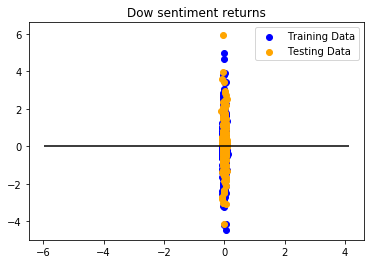

In [197]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Dow sentiment returns")
plt.show()

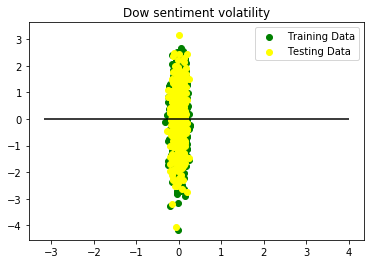

In [226]:
predictionsv = model.predict(xv_test_scaled)
model.fit(xv_train_scaled, yv_train_scaled)
plt.scatter(model.predict(xv_train_scaled), model.predict(xv_train_scaled) - yv_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(xv_test_scaled), model.predict(xv_test_scaled) - yv_test_scaled, c="yellow", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=yv_test_scaled.min(), xmax=yv_test_scaled.max())
plt.title("Dow sentiment volatility")
plt.show()

In [198]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(x_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2233824784767224, R2: -0.0008048185801643459


In [227]:
MSEv = mean_squared_error(yv_test_scaled, predictionsv)
r2v = model.score(xv_test_scaled, yv_test_scaled)

print(f"MSE: {MSEv}, R2: {r2v}")

MSE: 104.01304904652623, R2: -0.009754046729929744


In [228]:
model.score(xv_test_scaled, yv_test_scaled)

-0.009754046729929744

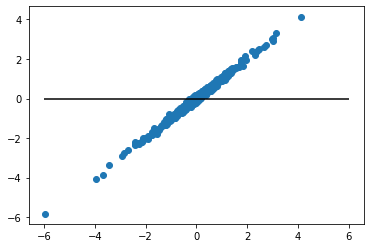

In [237]:
prediction = model.predict(x_test_scaled)
# Plot Residuals
plt.scatter(y_test_scaled, y_test_scaled-prediction)
plt.hlines(y=0, xmin=-6, xmax=6)
plt.show()

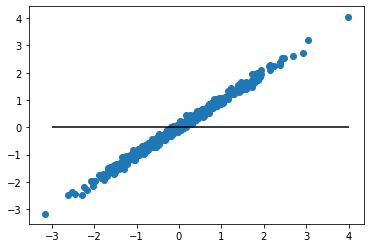

In [240]:
predictionv = model.predict(xv_test_scaled)
# Plot Residuals
plt.scatter(yv_test_scaled, yv_test_scaled-predictionv)
plt.hlines(y=0, xmin=-3, xmax=4)
plt.show()

x_train.head()